In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
for col in df.columns:
    print (f"{col} values: {df[col].unique()}")

age values: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital values: ['married' 'single' 'divorced' 'unknown']
education values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default values: ['no' 'unknown' 'yes']
housing values: ['no' 'yes' 'unknown']
loan values: ['no' 'yes' 'unknown']
contact values: ['telephone' 'cellular']
month values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week values: ['mon' 'tue' 'wed' 'thu' 'fri']
duration values: [ 261  149  226 ... 1246 1556 1868]
campaign values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 

#### look at value_counts to see if we have a large portion of unknown data

In [ ]:
for col in df.columns:
    print (f"Variable: {col}")
    print (df[col].value_counts())
    print ('')

Variable: age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

Variable: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Variable: marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Variable: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Variable: default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Variable: hou

y seems very unbalanced, maybe need to upsample yes?

#### drop duration

In [ ]:
df_clean=df.drop(labels=['duration'],axis=1)

In [ ]:
df_clean['y']=df_clean['y'].map({'yes':1, 'no':0})

## Dummy Variables

### 1. pdays

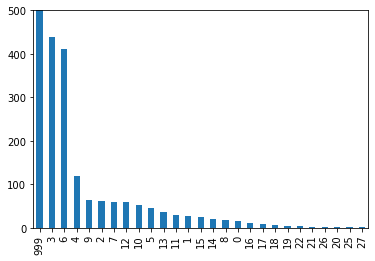

In [ ]:
axes = plt.gca()
axes.set_ylim([0,500])
df['pdays'].value_counts().plot(kind = 'bar')

In [ ]:
pdays_dummy=pd.get_dummies(df_clean['pdays'],prefix='pdays')

In [ ]:
org_columns=pdays_dummy.columns[:-1] #except pdays_99

In [ ]:
for i in [j*5 for j in range(0,6)]:
    if i<20:
        comb_col_name='pdays_'+str(i)+'_'+str(i+4)
        pdays_dummy[comb_col_name]=pdays_dummy.loc[:,['pdays_'+str(j) for j in range(i,i+5)]].sum(axis=1)
        pdays_dummy[pdays_dummy[comb_col_name].values >= 1] = 1
    if i>=20:
        comb_col_name='pdays_'+str(i)+'_'+str(i+2)
        pdays_dummy[comb_col_name]=pdays_dummy.loc[:,['pdays_'+str(j) for j in range(i,i+2)]].sum(axis=1)
        pdays_dummy[pdays_dummy[comb_col_name].values >= 1] = 1

In [ ]:
pdays_dummy=pdays_dummy.drop(org_columns,axis=1)

### 2.  other category variables

In [ ]:
category_variables=[ 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome']

In [ ]:
category_dummies=pd.DataFrame()

In [ ]:
for val in category_variables:
    dummies=pd.get_dummies(df_clean[val],prefix=val)
    category_dummies=pd.concat([category_dummies,dummies], axis=1)

In [ ]:
category_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# only bank client data

In [ ]:
df_bank=pd.concat([df_clean,category_dummies,pdays_dummy], axis=1).drop(['pdays','job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],axis=1)

In [ ]:
re_order=list(df_bank.columns)
re_order.remove('y')
re_order.append('y')

In [ ]:
df_bank=df_bank[re_order]

In [ ]:
df_bank

,age,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_nonexistent,poutcome_success,pdays_999,pdays_0_4,pdays_5_9,pdays_10_14,pdays_15_19,pdays_20_22,pdays_25_27,y
0,56,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,57,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,37,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,40,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,56,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
41184,46,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
41185,56,2,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
41186,44,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
import pickle
with open('df_bank.pkl', 'wb') as picklefile:
    pickle.dump(df_bank, picklefile)

## Bank and Economic Data

In [ ]:
df_econ=pd.concat([df_bank,df[['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]], axis=1)

In [ ]:
re_order=list(df_econ.columns)
re_order.remove('y')
re_order.append('y')
df_econ=df_econ[re_order]

In [ ]:
with open('df_econ.pkl', 'wb') as picklefile:
    pickle.dump(df_econ, picklefile)

In [ ]:
df_econ.head()

,age,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_10_14,pdays_15_19,pdays_20_22,pdays_25_27,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0


## Correlation

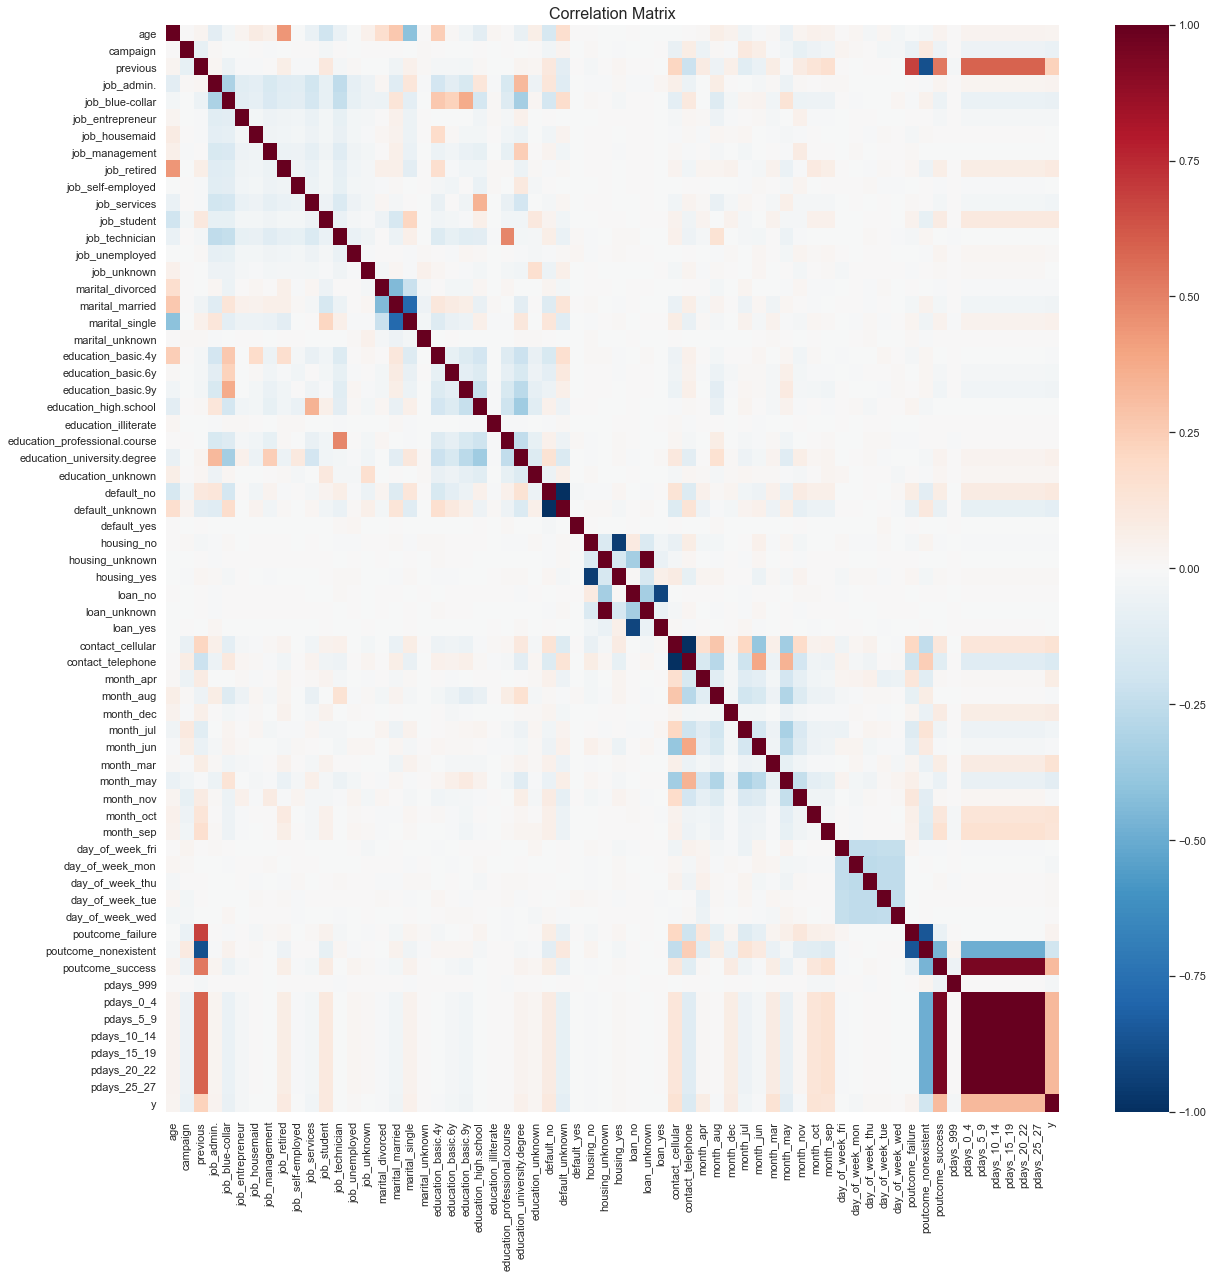

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df_bank.corr(), cbar=True, cmap="RdBu_r")#annot = True, fmt='.1g' for decimal
plt.title("Correlation Matrix", fontsize=16)
plt.show()

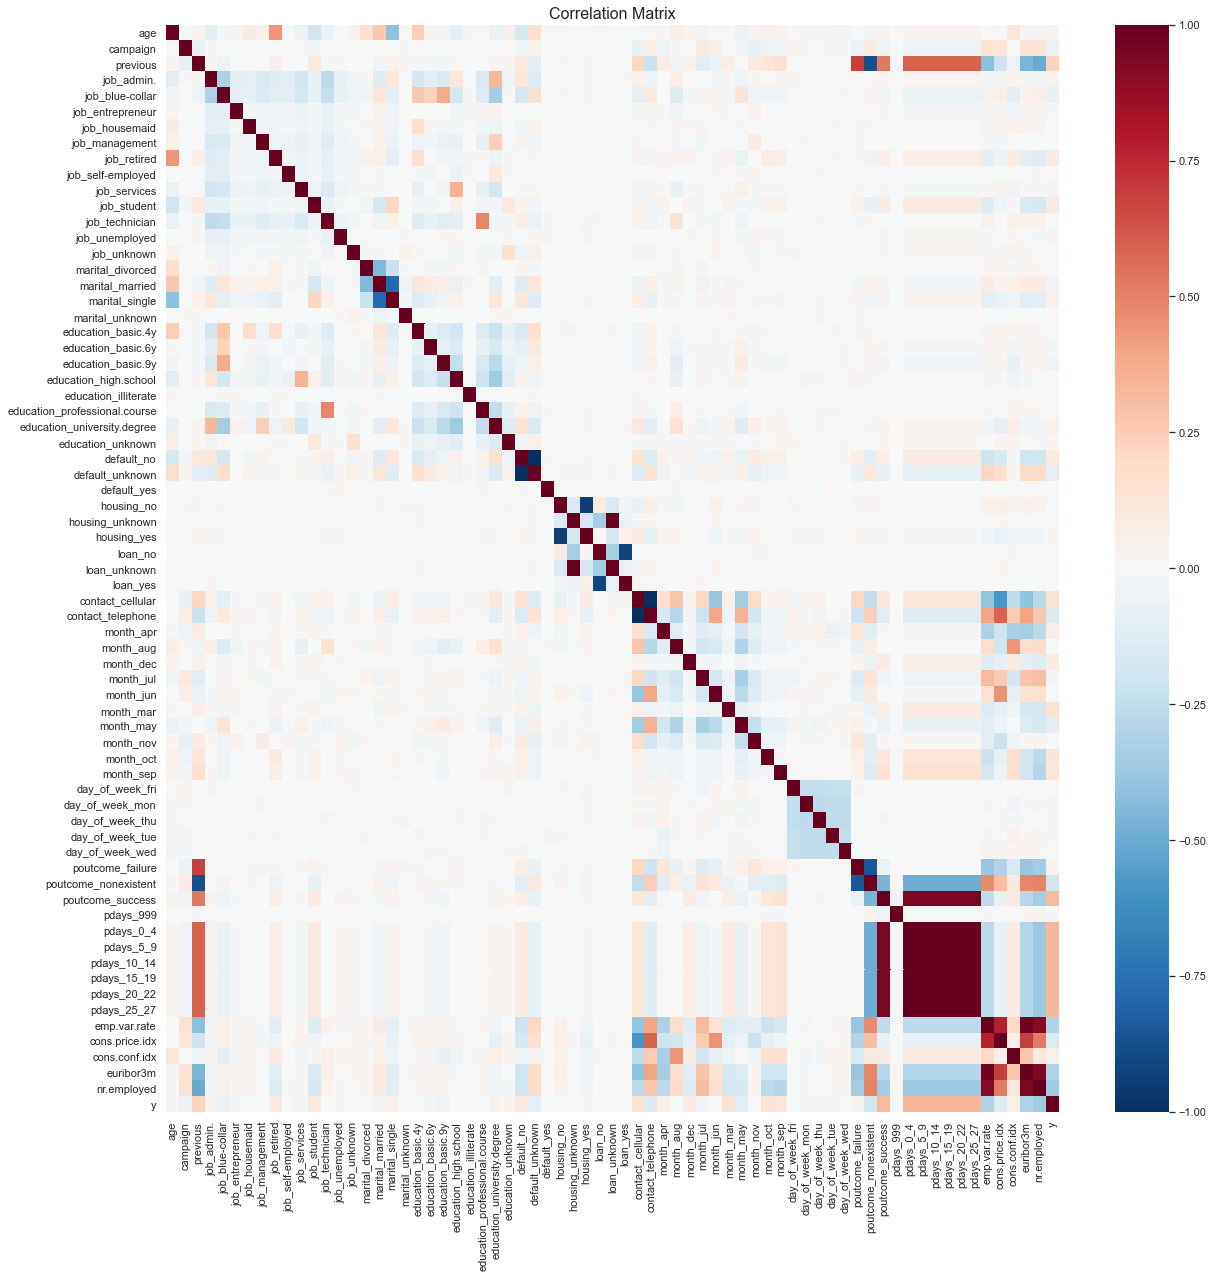

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df_econ.corr(), cbar=True, cmap="RdBu_r")#annot = True, fmt='.1g' for decimal
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## PCA 

#### bank

In [ ]:
from sklearn.model_selection import train_test_split
features=list(df_bank.columns.values)
features.remove('y')

X = df_bank[features]
Y = df_bank['y']

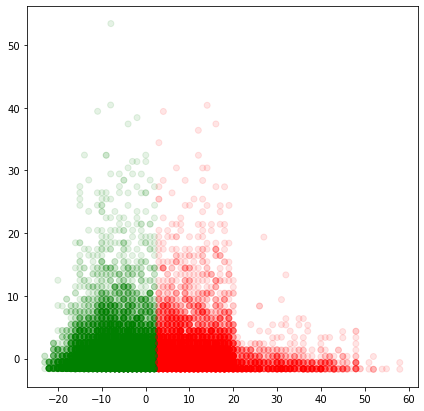

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# calling sklearn PCA 
pca = PCA(n_components=2)
# fit X and apply the reduction to X 
x_2d = pca.fit_transform(X)
# Set a 2 KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.1)
plt.show()

#### bank and econ

In [ ]:
from sklearn.model_selection import train_test_split
features=list(df_econ.columns.values)
features.remove('y')

X = df_econ[features]
Y = df_econ['y']

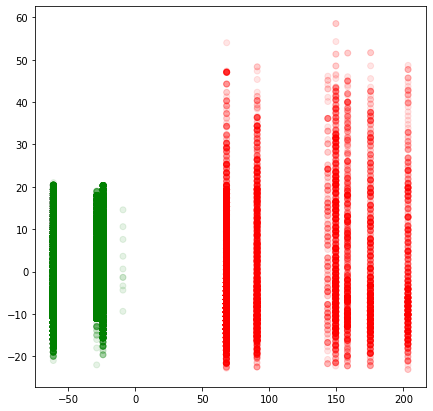

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# calling sklearn PCA 
pca = PCA(n_components=2)
# fit X and apply the reduction to X 
x_2d = pca.fit_transform(X)
# Set a 2 KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.1)
plt.show()